In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
datadf = pd.read_csv('https://github.com/muthukumaranrprepo/DataAnalyst-Python/blob/main/DataFiles/Churn_Modelling_Valid.csv?raw=True')
datadf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [2]:
datadf.Age.min()

18

In [3]:
datadf.Age.max()

92

In [5]:
#Feature Binning , create the bins and label using pd.cut()
#pd.cut()
labels = ['0-20','21-40','41-60','60+']
bins = [0,20,40,60,100]

datadf['Age_Bins'] = pd.cut(datadf.Age,labels=labels,bins=bins,include_lowest=True)
datadf.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Bins
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-60
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-60
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-60
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,21-40
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-60


In [6]:
datadf[['Age','Age_Bins']].to_csv('Age_Bins.csv',index=False)

In [8]:
datadf.Age_Bins.value_counts()

21-40    6330
41-60    3117
60+       464
0-20       89
Name: Age_Bins, dtype: int64

<BarContainer object of 4 artists>

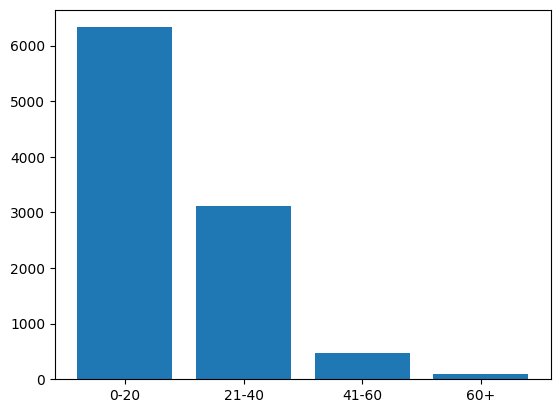

In [9]:
plt.bar(labels,datadf.Age_Bins.value_counts())


In [19]:
import plotly.express as px
plt.figure(figsize=(10,6))
px.bar(x=labels,y=datadf.Age_Bins.value_counts(),
       labels={'x': 'Age Bins', 'y': 'Count'},title='Age Distribution by Bins')


<Figure size 1000x600 with 0 Axes>